In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Q1
Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.htmlLinks to an external site. 
Stem or lemmatize the words and find counts.
Select the top 20 words and create a bar chart.
Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list of top words, alter your logic to exclude them.
Specify why you chose stemming or lemmatization.'

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\19133\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\19133\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


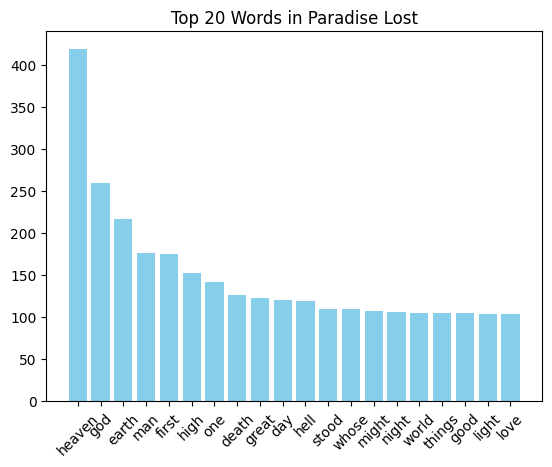

In [5]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('gutenberg')
nltk.download('stopwords')
mlp = nltk.corpus.gutenberg.words("milton-paradise.txt")
#reg cleaning to implement stopwords to mlp
clean_words = []
for word in mlp:
    if word.isalnum():
        word = word.lower()
        clean_words.append(word)
sw = nltk.corpus.stopwords.words('english')
add_stop = ['thou', 'thy', 'thee', 'thus', 'shall', 
                        'yet', 'though', 'us', 'far', 'may', 
                        'till', 'of', 'if', 'on', 's', 'like', 'hath']
filtered_words = []
#for loops to add the stop words including old timey versions I added
for word in clean_words:
    if word not in sw and word not in add_stop:
        filtered_words.append(word)
word_counts = {}
for word in filtered_words:
    if word in word_counts:
        word_counts[word] = word_counts[word] + 1
    else:
        word_counts[word] = 1
#sort the 20 top words
sortmlp = []
for word in word_counts:
    sortmlp.append((word, word_counts[word]))
sortmlp.sort(key=lambda x: x[1], reverse=True)
top_20 = sortmlp[:20]
words = []
counts = []
for word, count in top_20:
    words.append(word)
    counts.append(count)

plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 20 Words in Paradise Lost')
plt.show()

# Q2
(10 pts) Perform Vader Sentiment Analysis on the book.
Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.

Check comments on why I chose to use certian codes over others.

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
text = '''
        TERRIBLE
        '''
sentiment = analyzer.polarity_scores(text)
print(sentiment)

sentiments = []
compound = sentiment['compound']
pos = sentiment['pos']
neg = sentiment['neg']
neu = sentiment['neu']

sentiments.append({
    "text": text,
    "compound": compound,
    "positive": pos,
    "negative": neg,
    "neutral": neu
})
sentiments
#used a lambda function bc sentiments is a dictionary, its more concise, and this is a function that doesnt need to be looped which is exactly what we want. 
# Reduces computational cost.
most_negative = sorted(sentiments, key=lambda x: x['compound'])[:5]
most_positive = sorted(sentiments, key=lambda x: x['compound'], reverse=True)[:5]
most_neutral = sorted(sentiments, key=lambda x: abs(x['compound']))[:5]
#initally did [100] to get the 100 sentences but it worked so I removed limit.
print("Most Negative Sentences:")
for sentiment in most_negative:
    print(f"Compound: {sentiment['compound']}")
    print(f"Sentence: {sentiment['text']}...\n")

print("\nMost Positive Sentences:")
for sentiment in most_positive:
    print(f"Compound: {sentiment['compound']}")
    print(f"Sentence: {sentiment['text']}...\n")

print("\nMost Neutral Sentences:")
for sentiment in most_neutral:
    print(f"Compound: {sentiment['compound']}")
    print(f"Sentence: {sentiment['text']}...\n")


{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4767}
Most Negative Sentences:
Compound: -0.4767
Sentence: 
        TERRIBLE
        ...


Most Positive Sentences:
Compound: -0.4767
Sentence: 
        TERRIBLE
        ...


Most Neutral Sentences:
Compound: -0.4767
Sentence: 
        TERRIBLE
        ...



# Q3
(3 pts) Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.


The current logic doesn't account for the proper distinction between a neutral sentiment and positive/negative sentiments. To fix it we could do this: 
For Most Neutral, use sorted sentences by their neu scores (highest to lowest)
For Most Positive, use sorted by pos scores (highest to lowest), disregarding sentences with zero positivity
For Most Negative, use sorted by neg scores (highest to lowest)
With this correction, "TERRIBLE" will only show up in the Most Negative Sentences category as it should.
Only reason I am not is because every time I try to it the kernel collapses. 
